In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [8]:
d = pd.read_excel("Realized Schedule 20210101-20220208.xlsx")

In [9]:
d.Airline.unique()




array(['IA', 'JZ', 'CN', 'LJ', 'FP', 'WT', 'UK', 'TN', 'ZY', 'DO', 'KU',
       'NH', 'QU', 'MD', 'PW', 'CL', 'AY', 'ZT', 'SQ', 'EM', 'VW', 'PU',
       'WR', 'NU', 'OF', 'ML', 'NI', 'NV', 'OK', 'VJ', 'VD', 'BT', 'UI',
       'FO', 'MC', 'IR', 'IK', 'GM', 'SH', 'WU', 'LX', 'GQ', 'PJ', 'WJ',
       'KN', 'BZ', 'BJ', 'RT', 'WN', 'LW', 'JN', 'TJ', 'TV', 'PO', 'KJ',
       'DU', 'EN', 'SV', 'JE', 'ZP', 'NS', 'LZ', 'FZ', 'XA', 'KO', 'FK',
       'ID', 'RS', 'ZB', 'GX', 'ZL', 'YT', 'ZD', 'PL', 'JA', 'WY', 'UU',
       'JP', 'NG', 'XP', 'XG', 'RV', 'RZ', 'FB', 'KL', 'DT', 'YU', 'NW',
       'UE', 'YQ', 'YJ', 'MR', 'RO', 'FX', 'KZ', nan], dtype=object)

In [50]:
d.Date

AttributeError: 'DataFrame' object has no attribute 'Date'

In [10]:
airlines = pd.read_csv("/home/hinge/Downloads/convertcsv.csv")


In [45]:
airlines[airlines.IATA == "DO"]

,IATA,ICAO,Airline,Call sign,Country/Region,Comments
2352,DO,DOA,Dominicana de Aviación,DOMINICANA,Dominican Republic,defunct


In [46]:
import math

airline_new = {x: None for x in d.Airline.unique() }
for air in d.Airline.unique():
    if air in airlines.IATA.unique():
        k = airlines[airlines.IATA==air][['Airline', 'Country/Region']]
        airline_new[air] = k
        #if len(k) > 1:
        #    print(air, k)
    
    else:
        print(air,"No")

WU No
WJ No
NS No
XA No
YJ No
nan No


In [42]:
d.iloc[500,]

ScheduleTime    2021-01-16 12:20:00
Airline                          DO
FlightNumber                    986
Destination                     YXC
AircraftType                    32N
FlightType                        J
Sector                           CA
SeatCapacity                    180
LoadFactor                 0.172222
Name: 500, dtype: object

In [47]:
d.Sector.value_counts()

CA    17906
US    17575
IS      450
QA      345
AE      165
DK       95
SG       95
EG       88
CN       44
IQ        3
NL        1
MX        1
Name: Sector, dtype: int64

In [48]:
d[d.Sector == "DK"]

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
421,2021-01-13 11:25:00,DO,811,CPH,333,J,DK,262,0.145038
614,2021-01-21 12:25:00,DO,811,CPH,333,J,DK,262,0.030534
756,2021-01-28 11:15:00,DO,811,CPH,333,J,DK,262,0.030534
808,2021-01-31 12:00:00,DO,811,CPH,333,J,DK,262,0.045802
870,2021-02-03 11:25:00,DO,811,CPH,333,J,DK,262,0.030534
...,...,...,...,...,...,...,...,...,...
35202,2022-01-30 13:00:00,DO,811,CPH,333,J,DK,262,0.099237
35298,2022-01-31 12:35:00,DO,811,CPH,333,J,DK,262,0.068702
35701,2022-02-05 12:05:00,DO,811,CPH,333,J,DK,262,0.194656
35772,2022-02-06 12:30:00,DO,811,CPH,333,J,DK,262,0.141221


In [55]:
d.ScheduleTime
d["Passengers"] = d.LoadFactor*d.SeatCapacity

d2 = d.groupby("ScheduleTime").sum()
d2

,FlightNumber,SeatCapacity,LoadFactor,Passengers
ScheduleTime,,,,
2021-01-01 06:05:00,2707,189,0.026455,5.0
2021-01-01 06:35:00,874,142,0.408451,58.0
2021-01-01 08:20:00,2831,186,0.139785,26.0
2021-01-01 10:35:00,818,74,0.189189,14.0
2021-01-01 12:05:00,876,142,0.570423,81.0
...,...,...,...,...
2022-02-08 21:40:00,1496,197,0.406091,80.0
2022-02-08 22:00:00,2396,180,0.577778,104.0
2022-02-08 22:40:00,2961,200,0.265000,53.0


In [56]:
data = pd.read_excel("Realized Schedule 20210101-20220208.xlsx", parse_dates = True)
data = data.sort_values(by = "ScheduleTime").reset_index(drop = True)
data

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751


In [57]:
# holidays 
from pandas.tseries.holiday import *
from pandas.tseries.offsets import CustomBusinessDay

class GothamBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('New Year', month=1, day=1, observance=sunday_to_monday),
     Holiday('Groundhog Day', month=1, day=6, observance=sunday_to_monday),
     Holiday('St. Patricks Day', month=3, day=17, observance=sunday_to_monday),
     Holiday('April Fools Day', month=4, day=1),
     Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('Labor Day', month=5, day=1, observance=sunday_to_monday),
     Holiday('Canada Day', month=7, day=1, observance=sunday_to_monday),
     Holiday('July 4th', month=7, day=4, observance=nearest_workday),
     Holiday('All Saints Day', month=11, day=1, observance=sunday_to_monday),
     Holiday('Christmas', month=12, day=25, observance=nearest_workday)
   ]

Gotham_BD = CustomBusinessDay(calendar=GothamBusinessCalendar())

# add time stuff
data["Hour"] = data.ScheduleTime.dt.hour
data["Date"] = data.ScheduleTime.dt.date
data["Holiday"] = data.Date.isin(pd.date_range(min(data.Date), end=max(data.Date), freq=Gotham_BD)) == False
data["Weekday"] = data.ScheduleTime.dt.day_name()

data["QuarterEnd"] = data.ScheduleTime.dt.to_period("Q").dt.end_time
data["MonthEnd"] = data.ScheduleTime.dt.to_period("M").dt.end_time
# data["BusinessMonthEnd"] = data.ScheduleTime.dt.to_period("BM").dt.end_time
data["TimeToQuarterEnd"] = (data["QuarterEnd"] - data["ScheduleTime"]).dt.days
data["TimeToMonthEnd"] = (data["MonthEnd"] - data["ScheduleTime"]).dt.days
# data["TimeToBusinessMonthEnd"] = (data["BusinessMonthEnd"] - data["ScheduleTime"]).dt.days
data

/home/hinge/.virtualenvs/ai/lib/python3.10/site-packages/pandas/core/algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor,Hour,Date,Holiday,Weekday,QuarterEnd,MonthEnd,TimeToQuarterEnd,TimeToMonthEnd
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455,6,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451,6,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785,8,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189,10,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423,12,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091,21,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20


/home/hinge/.virtualenvs/ai/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


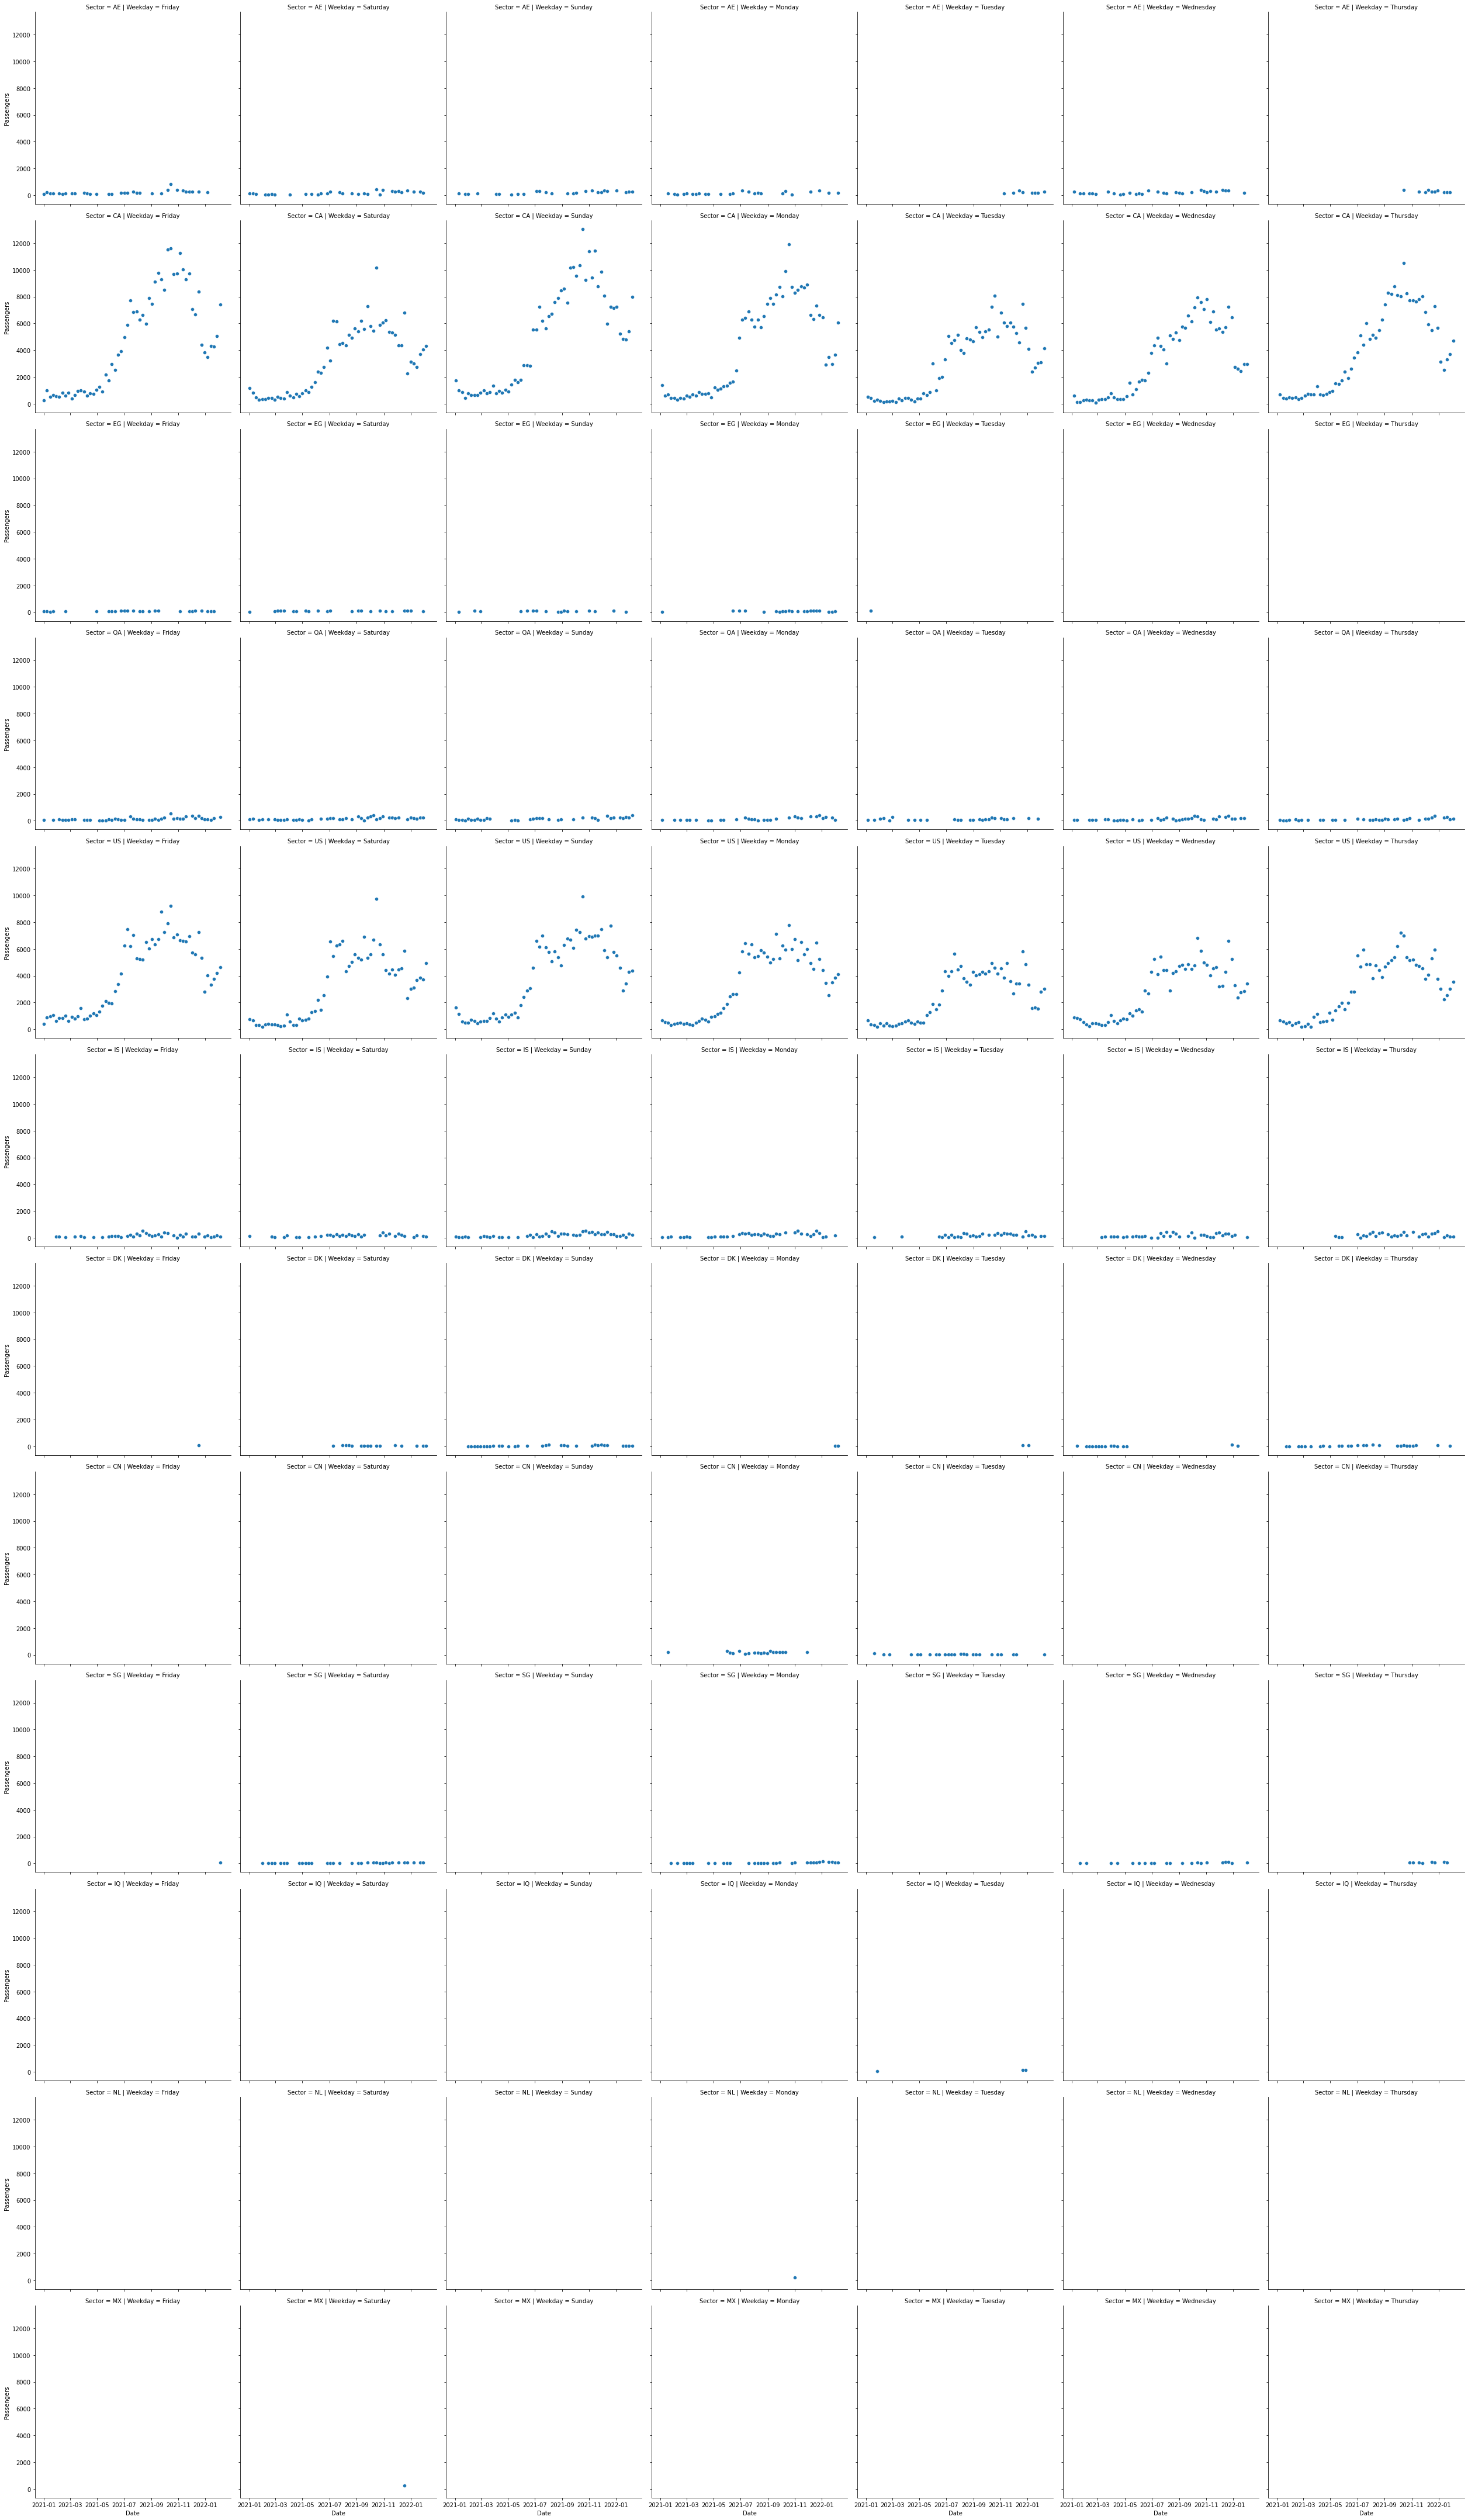

In [73]:
data["Passengers"] = data.SeatCapacity*data.LoadFactor
d2 = data.groupby(["Date","Sector","Weekday"]).sum()

d3 = d2[d2.Sector.isin(["US","CA"])]
d4 = d2[~d2.Sector.isin(["US","CA"])]

import seaborn as sns
sns.relplot("Date","Passengers",data=d3,row="Sector",kind="scatter",col="Weekday")

In [65]:
d2

FlightNumber  SeatCapacity  LoadFactor  Hour  Holiday  \
Date       Sector                                                          
2021-01-01 AE               550           428    0.231308    13        1   
           CA             10062          1697    1.708038   163       11   
           EG               753           146    0.369863    14        1   
           QA               553           283    0.187279    15        1   
           US             16252          1682    2.700921   159       11   
...                         ...           ...         ...   ...      ...   
2022-02-08 AE               550           428    0.612150    14        1   
           CA             66859          9240   24.511770   741       56   
           CN               832           262    0.099237    18        1   
           IS              2813           186    0.784946    12        1   
           US             54258          6707   19.260238   537       41   

                   TimeToQuarterEnd  TimeToMonthEnd  Passengers  
Date       Sector                                                
2021-01-01 AE                    89              30        99.0  
           CA                   979             330       237.0  
           EG                    89              30        54.0  
           QA                    89              30        53.0  
           US                   979             330       392.0  
...                             ...             ...         ...  
2022-02-08 AE                    51              20       262.0  
           CA                  2856            1120      4153.0  
           CN                    51              20        26.0  
           IS                    51              20       146.0  
           US                  2091             820      3037.0  

[1822 rows x 8 columns]